# INFO 2950 Final Project

In [114]:
import pandas as pd
import seaborn

In [115]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Reserach Question: Explore the change in the distribution of biased motivation of hate crime from 2016-2020, and the effect of Covid in between.

In [116]:
table1 = pd.read_csv('./Data_2019/Incidents_Offenses_Victims_and_Known_Offenders_by_Bias_Motivation_2019.csv', thousands=',')
table1.head()

,Bias_motivation,Incidents,Offenses,Victims1,Known_offenders2
0,Total,7314,8559,8812,6406
1,Single-Bias Incidents,7103,8302,8552,6268
2,Race/Ethnicity/Ancestry:,3963,4784,4930,3550
3,Anti-White,666,755,775,645
4,Anti-Black or African American,1930,2314,2391,1682


In [117]:
table4 = pd.read_csv('./Data_2019/Offenses_Offense_Type_by_Bias_Motivation_2019 v2.csv', thousands=',')
table4.head()

,Bias_motivation,Total_offenses,Murder_and_nonnegligent_manslaughter,Rape,Aggravated_assault,Simple_assault,Intimidation,"Human_Trafficking,_Commercial_Sex_Acts",Other_crimes_against_persons,Robbery,Burglary,Larceny_theft,Motor_vehicle_theft,Arson,Destruction_damage_vandalism,Other_crimes_against_properties,Crimes_against_society
0,Total,8559,51,30,1158,2023,2206,3,41,125,114,284,19,60,2152,57,236
1,Single-Bias Incidents,8302,51,30,1139,1976,2134,3,41,125,109,282,19,55,2050,57,231
2,Race/Ethnicity/Ancestry:,4784,31,12,726,1225,1385,0,13,62,46,149,13,16,901,35,170
3,Anti-White,755,0,6,108,240,143,0,3,16,10,56,4,1,72,15,81
4,Anti-Black or African American,2314,1,2,344,546,797,0,8,13,17,19,3,9,516,5,34


In [118]:
%sql offense_type << SELECT * FROM table1 FULL OUTER JOIN table4 ON table1.Offenses = table4.Total_Offenses

offense_type = offense_type.loc[:,~offense_type.columns.duplicated()]
offense_type = offense_type.drop(['Total_offenses'],axis=1)
offense_type.head()

Returning data to local variable offense_type


,Bias_motivation,Incidents,Offenses,Victims1,Known_offenders2,Murder_and_nonnegligent_manslaughter,Rape,Aggravated_assault,Simple_assault,Intimidation,"Human_Trafficking,_Commercial_Sex_Acts",Other_crimes_against_persons,Robbery,Burglary,Larceny_theft,Motor_vehicle_theft,Arson,Destruction_damage_vandalism,Other_crimes_against_properties,Crimes_against_society
0,Total,7314,8559,8812,6406,51,30,1158,2023,2206,3,41,125,114,284,19,60,2152,57,236
1,Single-Bias Incidents,7103,8302,8552,6268,51,30,1139,1976,2134,3,41,125,109,282,19,55,2050,57,231
2,Race/Ethnicity/Ancestry:,3963,4784,4930,3550,31,12,726,1225,1385,0,13,62,46,149,13,16,901,35,170
3,Anti-White,666,755,775,645,0,6,108,240,143,0,3,16,10,56,4,1,72,15,81
4,Anti-Black or African American,1930,2314,2391,1682,1,2,344,546,797,0,8,13,17,19,3,9,516,5,34


<AxesSubplot:>

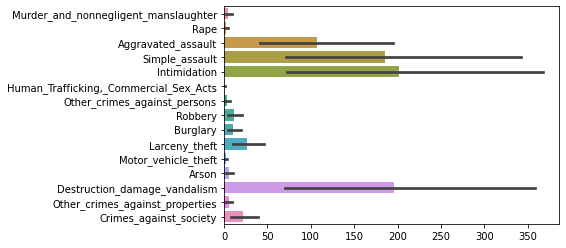

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

t4 = table4.drop(['Bias_motivation', 'Total_offenses'],axis=1)
sns.barplot(data=t4, orient = 'h')

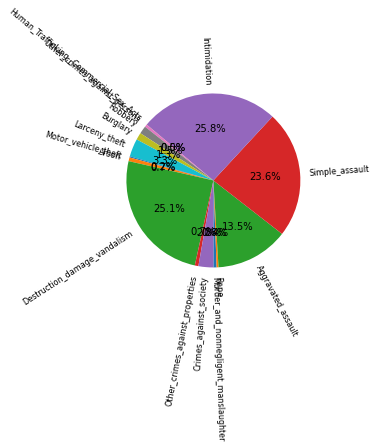

In [125]:
import math
t4 = table4.drop(['Bias_motivation', 'Total_offenses'],axis=1)

data = t4.iloc[0,:].to_numpy().tolist()
labels = t4.columns.to_list()
colors = sns.color_palette('pastel')[0:15]
fig, ax = plt.subplots()

# plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
l = ax.pie(data, autopct='%.1f%%', startangle=-90)

for label, t in zip(labels, l[1]):
    x, y = t.get_position()
    angle = int(math.degrees(math.atan2(y, x)))
    ha = "left"

    if x<0:
        angle -= 180
        ha = "right"

    plt.annotate(label, xy=(x,y), rotation=angle, ha=ha, va="center", rotation_mode="anchor", size=8)

plt.show()
